In [72]:
from pathlib import Path

import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

# 自动定位 pose_alignment 目录
CWD = Path.cwd()
if (CWD / "pose_alignment").exists():
    POSE_DIR = CWD / "pose_alignment"
else:
    POSE_DIR = CWD

RESULT_DIR = POSE_DIR / "result"
CSV_PATH = RESULT_DIR / "matches.csv"

print(f"使用 pose_alignment 目录: {POSE_DIR}")
print(f"匹配结果 CSV: {CSV_PATH}")

df = pd.read_csv(CSV_PATH)
print(f"共载入 {len(df)} 条匹配结果")
df.head()

使用 pose_alignment 目录: /home/dkr/codes/dsacstar/pose_alignment
匹配结果 CSV: /home/dkr/codes/dsacstar/pose_alignment/result/matches.csv
共载入 214 条匹配结果


,new_id,name_4dclip1,name_renders,similarity
0,0,0,847,0.657520
1,1,1,112,0.661442
2,2,2,828,0.660047
3,3,3,572,0.658245
4,4,4,1360,0.651799


In [73]:
import random


def show_pair(row_idx: int):
    if not (0 <= row_idx < len(df)):
        raise ValueError(f"row_idx 超出范围：0 ~ {len(df)-1}")

    row = df.iloc[row_idx]
    new_id = int(row["new_id"])
    name_4d = row["name_4dclip1"]
    name_r  = row["name_renders"]
    sim     = float(row["similarity"])

    rgb_dir_4d = RESULT_DIR / "sub_4dclip1" / "train" / "rgb"
    rgb_dir_r  = RESULT_DIR / "sub_renders" / "train" / "rgb"

    path_4d = next((p for p in rgb_dir_4d.glob(f"{new_id}.*")), None)
    path_r  = next((p for p in rgb_dir_r.glob(f"{new_id}.*")), None)

    print(f"new_id           : {new_id}")
    print(f"4dclip1 原始基名 : {name_4d}")
    print(f"renders 原始基名 : {name_r}")
    print(f"similarity       : {sim:.4f}")
    print(f"4dclip1 rgb 路径 : {path_4d}")
    print(f"renders rgb 路径 : {path_r}")

    if path_4d is None or path_r is None:
        print("找不到对应的 rgb 文件，检查 result 目录。")
        return

    img_4d = Image.open(path_4d).convert("RGB")
    img_r  = Image.open(path_r).convert("RGB")

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img_4d)
    axes[0].set_title("4dclip1")
    axes[0].axis("off")

    axes[1].imshow(img_r)
    axes[1].set_title("renders")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

new_id           : 109
4dclip1 原始基名 : 448.0
renders 原始基名 : 1422.0
similarity       : 0.6694
4dclip1 rgb 路径 : /home/dkr/codes/dsacstar/pose_alignment/result/sub_4dclip1/train/rgb/109.jpg
renders rgb 路径 : /home/dkr/codes/dsacstar/pose_alignment/result/sub_renders/train/rgb/109.png


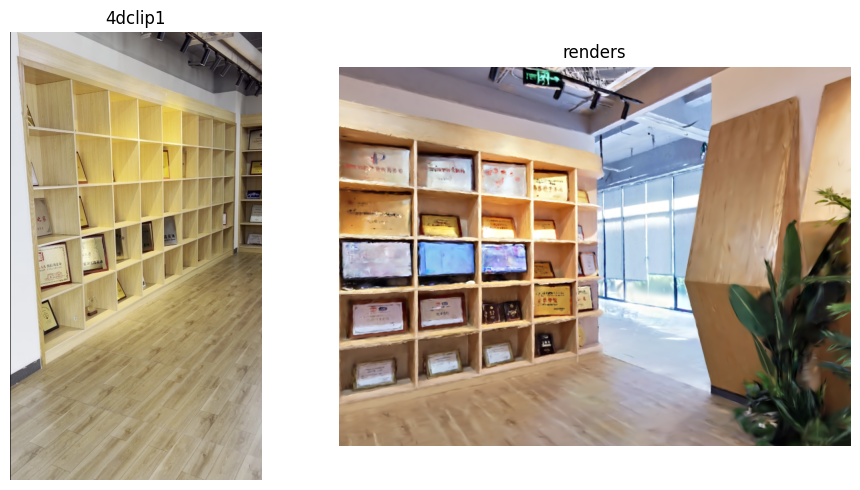

In [104]:
show_pair(random.randint(0, len(df)))